Notes:
* Quand à l'aise avec graphes, on refait cleaning et EDA en mode beau gosse
*  'PuBuGn': ['#F6EFF7', '#D0D1E6', '#A6BDDB', '#67A9CF', '#3690C0', '#02818A', '#016450']
* https://seaborn.pydata.org/tutorial/color_palettes.html

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

[Context](#Co)<br>
[Import packages and data](#0)<br>
    
1. [**Happiness around the world in 2019**](#2019)<br>
    [In which countries/regions of the world are people the happiest?](#Ha)<br>
    [Which factors explain the differences in happiness](#Fa)<br>
    
    
2. [**Trends in happiness from 2015 to 2019**](#Ev)<br>
    [In which countries/regions happiness has increased the most during this period?](#In)<br>
    [What does explain this growth?](#Ex)<br>
</div>
<hr>

<a name="Co"></a>
# Context

The World Happiness Report is a landmark survey of the state of global happiness from 2015 to 2019 according to 6 main factors:
* economic production, 
* social support, 
* life expectancy, freedom, 
* absence of corruption, 
* and generosity

### Purposes of the project
<ins> Data analysis: </ins>
1. Give a clear picture of happiness around the world in 2019
    * In which countries/regions of the world are people the happiest?
    * Which factors explain the differences in happiness ? 
2. Analyse trends in happiness from 2015 to 2019
    * In which countries/regions happiness has increased the most during this period?
    * What does explains this growth?
    
<ins> Forecasting with Machine Learning</ins>(*)
1. How happy will countries be in 2020 ?
2. In which countries happiness will increase in 2020 ?

(*) _Although data don't contain related information, the global pandemic may have a tremendous impact on the results

You can find the whole presentation and information about the data in the **Project Presentation** notebook

### Workflow
* **Cleaning**
* EDA
* Data Visualization
* Preprocessing
* Machine Learning

The first step of this project is to handle the different data files and detect and correct/remove corrupt or inaccurate records from the data to ensure that further analysis will be based on meaningful and relevant information.

----------
Now we have a better knowledge about our data thanks to EDA, our objective is to use Data Visualization to answer the following questions:

1. Give a clear picture of happiness around the world in 2019
    * In which countries/regions of the world are people the happiest?
    * Which factors explain the differences in happiness ?
    
    
2. Analyse trends in happiness from 2015 to 2019
    * In which countries/regions happiness has increased the most during this period?
    * What does explains this growth?

------------
------------
<a name="0"></a>
# Import packages and data

Let's first import the required packages investigate and plot data: **pandas**, **numpy** and **matplotlib** and **seaborn**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from dataviz_utils import *

We import the cleaned data

In [2]:
df = pd.read_csv('data/data_clean_norm.csv')
print("data dimension:",df.shape)

# we add quartiles
df["happiness_quartiles"]=pd.qcut(df["happiness_score"], 4, labels=["low", "low-mid", "top-mid", "top"])

# years to string
df["year"] = df["year"].apply(lambda x: str(x))

# for map
df['country'].replace({'Serbia': 'Republic of Serbia', 'Tanzania': 'United Republic of Tanzania',
                       'Congo (Brazzaville)': 'Republic of the Congo', 'Congo (Kinshasa)': 'Democratic Republic of the Congo',
                       'United States': 'United States of America'}, inplace=True)

# dataset containing all the years of study
df_tot = df.copy()
# dataset containing only data for 2019
df = df.loc[df["year"]=="2019"]

data dimension: (705, 11)


We prepare template data to build a map

In [3]:
# import world country boundaries
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'
response = requests.get(url)
data = response.json()
  
# template to build map
world_geo = r'world_countries.json'

In [4]:
l_factors = ['gdp_per_capita', 'life_expectancy', 'social_support', 'freedom','generosity','corruption_perception']
l_regions = list(set(df['region'].tolist()))
l_quartiles = ["top", "top-mid", "low-mid", "low"]

------------
------------
<a name="2019"></a>
# 1. World Happiness

<a name="Ha"></a>
## In which countries/regions of the world are people the happiest?

In [5]:
country_map(df, "country", "happiness_score", [45,0], 1.8, world_geo, "happiness", threshold_scale=None)

As we can see on the map:
* People feeling the happiest live in **North America (United States and Canada)**, **Australia and New Zealand**, and **North-Western Europe**. **Latin America** seems to have an overall good happiness perception too.
* People feeling the lowest happy are in south Asia and Africa

The following graph - that displays the average happiness for regions in the world - confirms these observations.

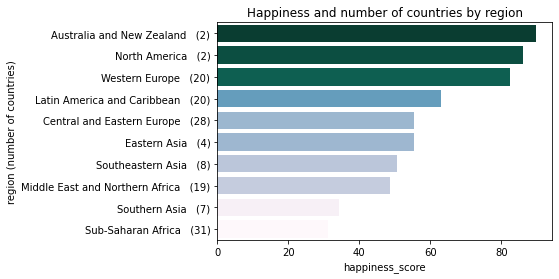

In [6]:
bar_reg(df,"region","happiness_score", "Happiness and number of countries by region")

Although People living in **Sub-Saharan Africa** seems to have the lowest perception of happiness, this region represents several country and we can see on the map that happiness is very heterogeneous. Central and Eastern Europe, in which people feel moderately happy, seems to also present a large number of countries with large differences in happiness.

Having a closer look at these countries may be interesting:

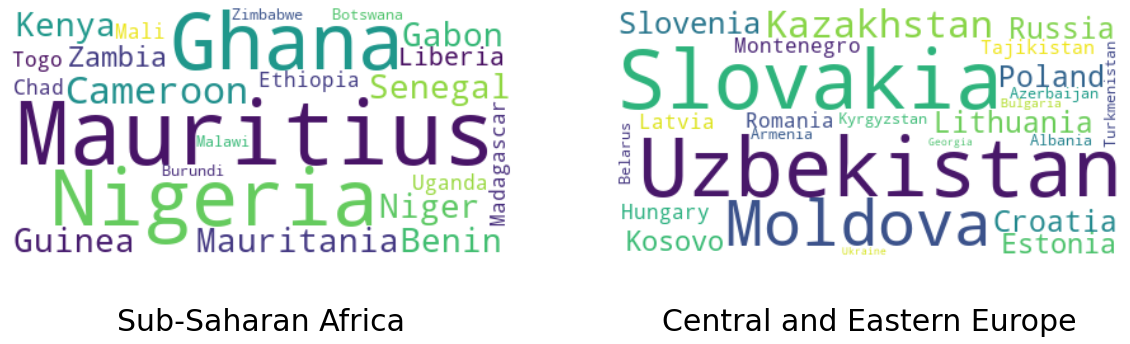

In [7]:
multiple_wordcloud_region(df, ['Sub-Saharan Africa','Central and Eastern Europe'] ,"happiness_score" )

### TOP 10 happies country

In [8]:
display(df[['region','country','happiness_rank']].sort_values(by="happiness_rank", ascending=True).set_index("country").head(10))

,region,happiness_rank
country,,
Finland,Western Europe,1
Denmark,Western Europe,2
Norway,Western Europe,3
Iceland,Western Europe,4
Netherlands,Western Europe,5
Switzerland,Western Europe,6
Sweden,Western Europe,7
New Zealand,Australia and New Zealand,8
Canada,North America,9


The TOP 7 happiest countries in the world are in Western and Northern Europe

------------------------------
<a name="Ha"></a>
## Which factors explain the differences in happiness ?

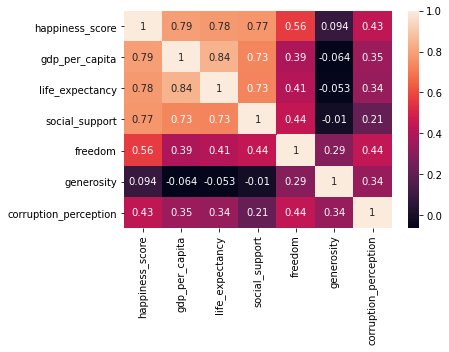

In [9]:
corr_matrix=df[["happiness_score"]+l_factors].corr()

sns.heatmap(corr_matrix, annot = True)

The correlation matrix gives us an idea of the strength of the relationships between `happiness_score` and the different factors: With correlation >0.7, a relationship is considered as strong, while one with <0.3 is considerer as weak.

`Happiness_score` seems to be strongly correlated to `gdp per capita`, `life expectancy`, `social supports` and, to a lesser extent, `freedom`. Let's see if we can find more information: 

In [10]:
#palette = ['#F6EFF7', '#D0D1E6', '#A6BDDB', '#67A9CF', '#3690C0', '#02818A']
#multiple_bar_chart(df, "happiness_quartiles", l_factors, palette)

### Life expectancy, gdp per capita, and social support

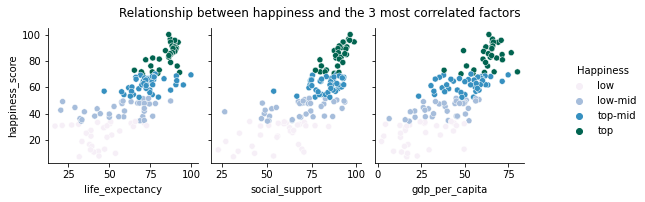

In [11]:
g=sns.pairplot(df, y_vars="happiness_score", x_vars=['life_expectancy', 'social_support','gdp_per_capita'], hue="happiness_quartiles",
            palette=['#F6EFF7', '#A6BDDB', '#3690C0', '#016450'], diag_kind = None)
g.fig.suptitle("Relationship between happiness and the 3 most correlated factors", y=1.08)
g._legend.set_title("Happiness")

Looking at the distribution of the countries in respect to happiness and our 3 "strong factors", we can observe that these relationships are very linear: **the higher the factors, the higher the happiness**

### coruption perception

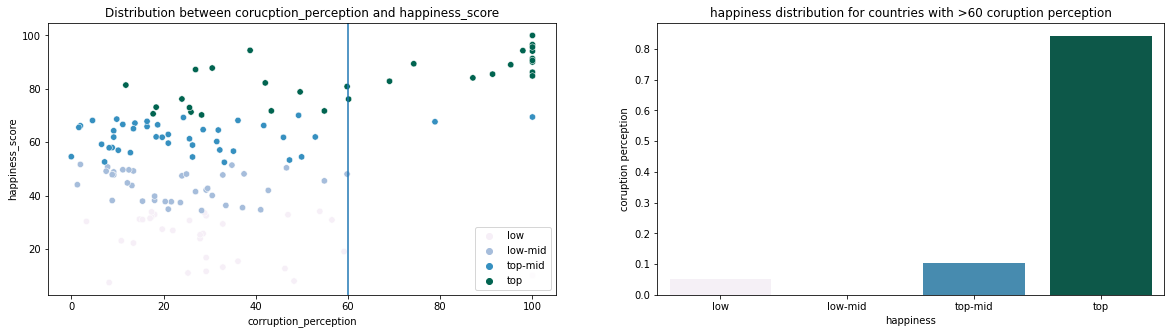

In [12]:
plt.figure(figsize=(20,5))
df_high_corr = df[df["corruption_perception"]>=60]

i = 121 # subplot initial position
for factor in ['happiness_score']:
    plt.subplot(i)
    #plt.scatter(df['happiness_score'], df[factor], c = 'year')
    plot = sns.scatterplot(y=factor, x='corruption_perception', data=df, hue="happiness_quartiles", s=40, 
                           palette= ['#F6EFF7', '#A6BDDB', '#3690C0', '#016450'])
    plot.set_title("Distribution between corucption_perception and happiness_score")
    plot.axvline(60)
    plt.legend(loc='lower right')
    i+=1
    
    plt.subplot(i)
    s = df_high_corr["happiness_quartiles"].value_counts(-1).rename('coruption perception').reset_index()
    s.rename(columns={"index":"happiness"},inplace=True)

    g = sns.barplot(x="happiness", y='coruption perception', data=s, palette=['#F6EFF7', '#A6BDDB', '#3690C0', '#016450'], orient="v")
    g.set_title("happiness distribution for countries with >60 coruption perception")

While, `coruption perception` have a weak correlation with `happiness`. We can observe a very meaningful behavior here.
On the left plot, we can see that if `coruption perception` is **higher than 60**, most of the countries are in the TOP25% happiest ones. 
Precisely, the chart on the right evidences that **4 countries with `coruption perception` >60 in 5 belong to these TOP happiest countries**.

### Freedom and Generosity

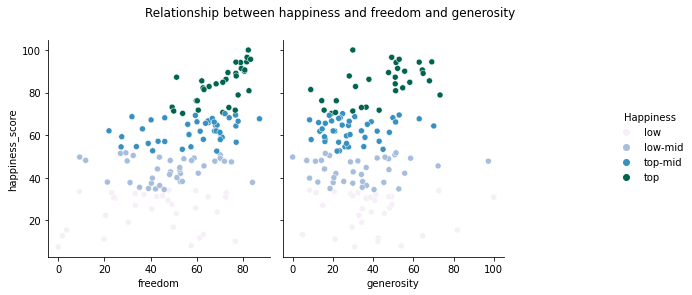

In [13]:

g=sns.pairplot(df, y_vars="happiness_score", x_vars=['freedom','generosity'], hue="happiness_quartiles",
            palette=['#F6EFF7', '#A6BDDB', '#3690C0', '#016450'], diag_kind = None)
g.fig.suptitle("Relationship between happiness and freedom and generosity", y=1.08)
g._legend.set_title("Happiness")
g.fig.set_size_inches(10,4)

Like we saw in correlation matrix, `freedom` and `generosity` have respectively average (0.5) and weak (0.1) relationships with `happiness`. While this relationship seems to be linear for the former, there is no pattern to highlight for the latter. 

------------
------------
<a name="Ev"></a>
# 2. Trends in happiness from 2015 to 2019

Notes:
* Pour chaque région, faire un subplot: 1 ligne pour chaque factor

<a name="In"></a>
## In which countries/regions happiness has increased during this period?

In [14]:
df_2015 = df_tot.loc[df_tot["year"]=="2015"].copy()
df_2015.rename(columns=dict(zip(df.columns.tolist(),[col+"_2015" if col!="country" else col for col in df.columns.tolist()])), inplace=True)

df_evol = pd.merge(df, df_2015, on="country", how="inner")

df_evol["evol"] = (df_evol["happiness_score"]-df_evol["happiness_score_2015"])

In [15]:
df_evol['evol'].describe()

count    141.000000
mean       1.595673
std       10.291025
min      -42.657201
25%       -4.584178
50%        0.831643
75%        7.363083
max       31.298174
Name: evol, dtype: float64

In [16]:
country_map(df_evol, "country", "evol", [45, 0], 1.8, world_geo, "Happiness evolution from 2015 to 2019",
            threshold_scale=[-45, -10, 0, 5, 35])

We can make several observation with the map:
* **Latin America** Happiness has significantly decreased between 2015 and 2019 (-45 to -10)
* **Estearn Asia**, **Western Europe** happiness has increased (+0 to +35)
* **Western Africa** happiness has sharply increased (+5 to +35)

----------
<a name="Ex"></a>
## What does explain this growth?

In [24]:
df['region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [17]:
df_evol['region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [18]:
df_pos = df_evol[df_evol['evol']>5]
display(df_pos.shape)

evol_countries = df_pos['country'].tolist()

(48, 24)

In [21]:
df_test = df_tot[df_tot["country"].isin(evol_countries)][l_factors+["year"]+["happiness_score","region"]]
display(df_test.shape)

(240, 9)

In [42]:
df_test['region'].replace({"Southeastern Asia":"focus Asia","Southern Asia":"focus Asia"}, inplace=True)

df_tmp = df_test[["year"]+l_factors+["happiness_score","region"]].groupby(["year",'region'], axis=0).mean()

df_tmp.reset_index(inplace=True)


display(df_tmp.head(10))

,year,region,gdp_per_capita,life_expectancy,social_support,freedom,generosity,corruption_perception,happiness_score
0,2015,Central and Eastern Europe,47.700518,65.671842,65.332334,46.723165,32.401228,17.470069,50.042017
1,2015,Eastern Asia,39.512882,52.820333,79.111922,60.256906,64.902344,8.760619,41.277890
2,2015,Latin America and Caribbean,33.748449,60.270377,65.555049,72.868785,48.835449,40.950800,52.068966
3,2015,Middle East and Northern Africa,40.287214,68.422436,38.774331,34.254144,67.415039,38.591414,21.977688
4,2015,Sub-Saharan Africa,18.464189,28.220704,44.596322,53.109116,40.637523,33.150289,20.270851
5,2015,Western Europe,57.815601,79.048495,68.733982,57.691068,46.136393,30.417706,61.764706
6,2015,focus Asia,25.299380,49.861525,44.725061,61.869820,64.119629,29.489867,36.734280
7,2016,Central and Eastern Europe,53.100293,58.239827,53.777025,39.863161,32.839286,20.005494,52.348595
8,2016,Eastern Asia,47.162691,48.614373,66.291363,49.685083,67.458984,10.794686,41.947262
9,2016,Latin America and Caribbean,38.770754,51.556529,53.487226,60.764848,48.978027,36.369220,55.709939


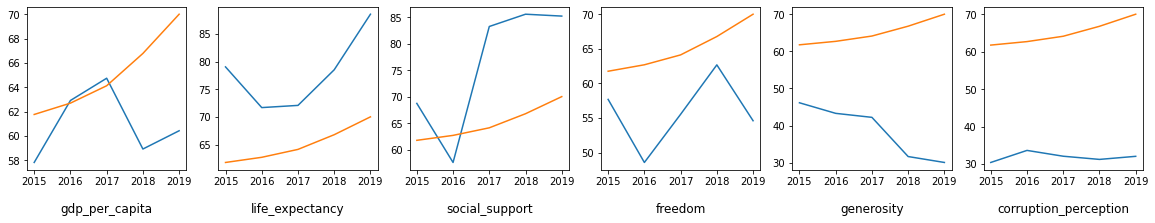

In [43]:
fig = plt.figure(figsize=(20,3))
j = 161

for f in l_factors:
    plt.subplot(j)
    dffff = df_tmp[df_tmp['region']=='Western Europe'][['year',f,"happiness_score"]]
    plt.plot(dffff["year"], dffff[f])
    plt.plot(dffff["year"], dffff["happiness_score"])
    j+=1
    plt.title(f, y=-0.3)
    #fig.suptitle(col+" histogram", fontsize=15)
    
plt.show()

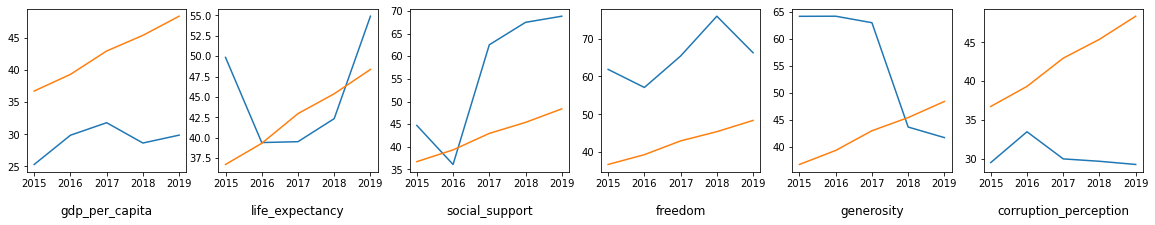

In [46]:
fig = plt.figure(figsize=(20,3))
j = 161

for f in l_factors:
    plt.subplot(j)
    dffff = df_tmp[df_tmp['region']=='focus Asia'][['year',f,"happiness_score"]]
    plt.plot(dffff["year"], dffff[f])
    plt.plot(dffff["year"], dffff["happiness_score"])
    j+=1
    plt.title(f, y=-0.3)
    #fig.suptitle(col+" histogram", fontsize=15)
    
plt.show()

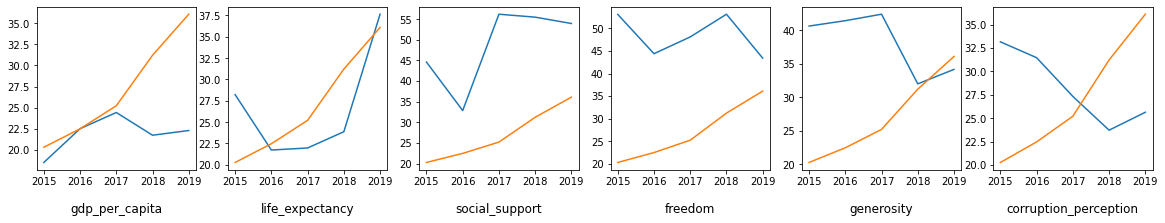

In [47]:
fig = plt.figure(figsize=(20,3))
j = 161

for f in l_factors:
    plt.subplot(j)
    dffff = df_tmp[df_tmp['region']=='Sub-Saharan Africa'][['year',f,"happiness_score"]]
    plt.plot(dffff["year"], dffff[f])
    plt.plot(dffff["year"], dffff["happiness_score"])
    j+=1
    plt.title(f, y=-0.3)
    #fig.suptitle(col+" histogram", fontsize=15)
    
plt.show()